<a href="https://colab.research.google.com/github/bhavinithak/Udemy_ML_A-Z/blob/main/ML_model_templates/Reinforcement_Learning/Upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [18]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [19]:
import math
N = 1000 #users
d = 10 #ads
ads_selected =[]
numbers_of_selection = [0]*d
sums_of_rewards = [0]*d
total_reward = 0

for n in range(0,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0,d):
    if numbers_of_selection[i]>0:
      avg_reward = sums_of_rewards[i]/numbers_of_selection[i]
      delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selection[i])
      upper_bound = avg_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound> max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selection[ad] +=1
  reward = dataset.values[n,ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results

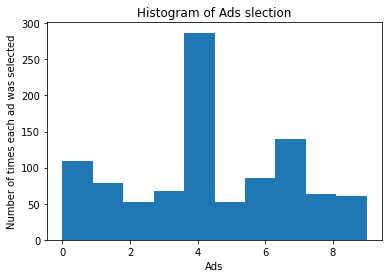

In [20]:
plt.hist(ads_selected)
plt.title('Histogram of Ads slection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()